# Reading and writing files

*CU Boulder GEOL 3600/5700 Introduction to Python Programming for Earth Scientists*

4 October 2023

### Goals

- open a file with the `open()` function
- define and describe a *file object*
- use the "r" mode to open an existing file for reading
- read text file contents with `f.read()`, `f.readline()`, and `f.readlines()`
- split lines using `str.split()`
- close a file manually with `f.close()`
- use the `with` keyword to read data from a file and automatically close it afterward
- use read data from a csv-format file
- use the "x" and "w" modes to create a new file for writing
- create a new csv-format file
- read a text file with numpy `loadtxt()`
- write a text file with `f.write()`
- write a text file with numpy `savetxt()`

### Any last-minute questions on current assignment?

## Presentations on Python packages/functions

## Quick review from last time: matplotlib

- Python plotting package inspired by Matlab
- Import it using: `import matplotlib.pyplot as plt`
- We looked at the `plot()`, `scatter()`, and `hist()` functions

### NOTE: Make sure to set the kernel (upper-left button) to "CSDMS" (not "Python 3 (ipykernel)")

### <span style="color: purple;">Science example: layers in ice cores</span>

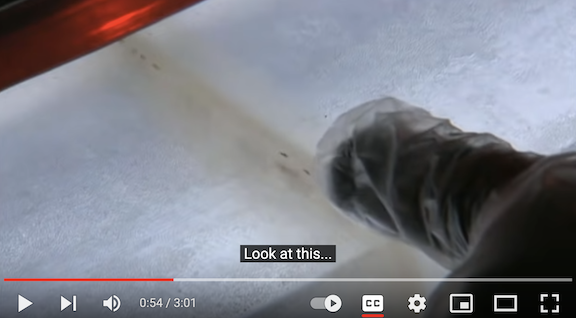

### <span style="color: green;">IN-CLASS PRACTICE: review and warm-up</span>

Plotting a histogram of annual ice-layer thickness from the GISP2 ice core in Greenland.

In [ ]:
# import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# use help() to get information about the hist() function
#help(plt.hist)

# Here we load a pre-processed txt file containing annual ice thickness 
# from the Greenland "GISP2" ice core
LT = np.loadtxt("greenland_gisp2_LT.txt")
print("LT is of type:", type(LT))
print("The shape of LT is", LT.shape)

# We see that LT is a 719-element numpy array.
# Use the matplotlib hist() function to plot a histogram of 
# the ice core layer thickness with 20 bins
plt.hist(LT, bins=20)

# label the x and y-axis
plt.xlabel("Ice layer thickness (m)")
plt.ylabel("Number of values")

# add a title


## Some examples of text-format tabular data

**Tabular** means the data can be formatted as a table, with rows containing individual points in time or space, and columns containing different attributes.

**Text** means that the data are stored as text characters that can be read by a human, rather than in pure binary numerical form that is not human-readable. Binary files take up less storage space but are less transparent and flexible than text files. 

### Examples of space- or tab-deliminted format

- [Mauna Loa CO2 records](https://gml.noaa.gov/ccgg/trends/data.html)
- [Total Solar Irradiance](https://ngdc.noaa.gov/stp/solar/solarirrad.html#composite)
- [Boulder Daily Weather data](https://psl.noaa.gov/boulder/data/boulderdaily.complete.txt)
- [Boulder Creek discharge data](https://waterdata.usgs.gov/monitoring-location/06730200/#parameterCode=00060&showMedian=true&startDT=2022-10-01&endDT=2023-09-30)

### Examples of comma-separated values (csv) format

- [Mauna Loa CO2 records](https://gml.noaa.gov/ccgg/trends/data.html)
- [Weather and soil data, Gordon Gulch](https://www.hydroshare.org/resource/d30b44383d154225b3c99e557d124b7d/)


## Opening and closing files

`open()` opens up a file for reading or writing. Example:
```
f = open("greenland_gisp2_LT.txt")
```
`open()` returns a **file object**.

To *close* the file, use the file object's `close()` method:
```
f.close()
```

In [ ]:
f = open("greenland_gisp2_LT.txt")
print(f)
f.close()

Let's inspect the help for `open()`:
```
help(open)
```

In [ ]:
help(open)

### By the way: "function" or "method"?

"method" is terminology from a programming style called **object-oriented programming**.

It refers to a function that is called *through a particular data object*. 
```
f = open("greenland_gisp2_LT.txt") # <= open() is a Python *function*
f.close() # <= close() is a *method* that can only be called from a particular file object
```

We'll dive in deeper later in the semester when we explore Python *classes* and object-oriented programming.

In [ ]:
help(open)

### File *mode*

The *mode* argument specifies what you want to do with the file:

```
    ========= ===============================================================
    Character Meaning
    --------- ---------------------------------------------------------------
    'r'       open for reading (default)
    'w'       open for writing, truncating the file first
    'x'       create a new file and open it for writing
    'a'       open for writing, appending to the end of the file if it exists
    'b'       binary mode
    't'       text mode (default)
    '+'       open a disk file for updating (reading and writing)
    ========= ===============================================================
```
The default is `rt`: *read text*

## Reading data from a file

There are three common file object methods for reading:

1. `read(size)` - read `size` characters (text) or bytes (binary), or the whole contents if `size` is omitted
2. `readline()` - read one line from the file as a string (up to a newline character or the end-of-file)
3. `readlines()` - read all the lines as a list of strings

We'll try these out on the example dataset `hardangerjokulen.csv`:

```
Altitude min,Altitude max,Area,Specific winter,Specific summer 
(masl),(masl),(km2),balance (m w.e.),balance (m w.e.)
1850,1865,0.09,2.7,-1.45
1800,1850,3.93,3.45,-1.5
1750,1800,4.03,3.6,-1.6
1700,1750,3.46,3.5,-1.75
1650,1700,1.94,3.2,-1.9
1600,1650,0.75,2.7,-2.1
1550,1600,0.59,2.35,-2.3
1500,1550,0.57,1.95,-2.5
1450,1500,0.29,1.73,-2.7
1400,1450,0.19,1.56,-2.95
1350,1400,0.1,1.39,-3.2
1300,1350,0.1,1.22,-3.45
1250,1300,0.27,1.05,-3.7
1200,1250,0.36,0.8,-3.95
1150,1200,0.28,0.55,-4.25
1100,1150,0.11,0.3,-4.55
1020,1100,0.05,-0.05,-4.9
```

```
# Here's an example of reading the whole file into one big string:
f = open("hardangerjokulen2006-2007.csv")
mydata = f.read()
f.close()
print(mydata)
print(type(mydata))
```

In [ ]:
f = open("hardangerjokulen2006-2007.csv")
mydata = f.read()
f.close()
print(mydata)
print(type(mydata))

### PRACTICE TIP: Always close a file object when you are done with it!

If you open a lot of files without closing them, you might run out of computer memory

### Reading individual lines

It's nice that we fetched the data, but the format---one big long string---isn't so useful. How about reading just one line at a time? Let's try reading just the 2 header lines and then the first line of data.
```
f = open("hardangerjokulen2006-2007.csv")
header1 = f.readline()
header2 = f.readline()
first_data_line = f.readline()
f.close()

print(header1)
print(header2)
print(first_data_line)
```

In [ ]:
f = open("hardangerjokulen2006-2007.csv")
header1 = f.readline()
header2 = f.readline()
first_data_line = f.readline()
f.close()

print(header1)
print(header2)
print(first_data_line)

### Splitting strings

Now at least we have just one row of data by itself, but once again the format isn't very useful: it's just a string. We'd like to be able to get the individual attributes: elevation, area, winter balance, and summer balance. One way to do this is to use the string `split()` method.

In [ ]:
help(str.split)

`str.split()` takes a string and splits it into a list of one or more substrings, separated either by a space (the default) or a character you specify.

Example:
```
fave_fruits = "mango strawberry cherry"
split_fruits = fave_fruits.split()
print(split_fruits)
```


In [ ]:
fave_fruits = "mango strawberry cherry"
split_fruits = fave_fruits.split()
print(split_fruits)

In our example, we want to split the string `"1850,1865,0.09,2.7,-1.45"` into its individual numbers. To make that happen with `split()` we have to specify that the separation character isn't a space, but is instead a comma.

Example:
```
my_vals = first_data_line.split(sep=",")
print(my_vals)
```

In [ ]:
my_vals = first_data_line.split(sep=",")

We're getting there but not quite. Let's see if we can convert the list into an array:
```
data_line_as_array = np.array(my_vals)
print(data_line_as_array)
```

In [ ]:
data_line_as_array = np.array(my_vals)
print(data_line_as_array)

We succeeded in making an array, but it's an array of `str`, which isn't quite what we want.

By the way, the `\n` is a **newline character** - a normally invisible character in the text file that tells the program reading it that it should skip to the next line before displaying further characters in the file.

To get our data as `float`, we can use the optional `dtype` argument to `array()`:
```
data_line_as_array = np.array(my_vals, dtype=float)
print(data_line_as_array)
```

In [ ]:
data_line_as_array = np.array(my_vals, dtype=float)
print(data_line_as_array)

### Using a 2d array

All right! But that's just one line of data. We want all 17 of them. A convenient approach is to create a 2D array: the rows will contain data for each elevation band, and the columns will contain data for each of the attributes. 

Here's how indexing works in a 2d array. Let's make a little example:
```
a = np.arange(12).reshape((3, 4)) # 3 rows by 4 columns
print(a)
```

In [ ]:
a = np.arange(12).reshape((3, 4))
print(a)

Examples of slicing a 2d array:
```
# row 1, column 2
print(a[1, 2])

# row 1, all columns
print(a[1, :])

# column 2, all rows
print(a[:, 2])
```

In [ ]:
print(a[:, 2])

### Making an array for the glacier data

We know from inspecting the file that there are 5 attributes, so we'll create a 17x5 array:
```
hardang_data = np.zeros((17, 5)) # <= pass the tuple (17, 5) to specify number of rows and columns
```

The below code reads just the first data line into this array:
```
f = open("hardangerjokulen2006-2007.csv")
hdr1 = f.readline() # 1st header line
hdr2 = f.readline()
hardang_data[0,:] = f.readline().split(sep=",") # <= you're going to replace this line with a for loop
f.close()

print(hardang_data)
```

In [ ]:
hardang_data = np.zeros((17, 5))
f = open("hardangerjokulen2006-2007.csv")
hdr1 = f.readline() # 1st header line
hdr2 = f.readline()
hardang_data[0,:] = f.readline().split(sep=",")
f.close()
print(hardang_data)

GOT HERE!

### <span style="color: green;">IN-CLASS PRACTICE</span>

Write a version of the above code that uses a `for` loop to read each data line into a row in the `hardang_data` array. You'll want to loop 17 times. You can use a counter variable in the `for` loop to index each row.

HINT: if your counter variable is called `i`, then in each iteration of your loop you will be assigning values to all columns of row `i`: 
```
hardang_data[i,:] = ...<see above>...
```

Print out the resulting value of the `hardang_data` array.

Now we're finally in a position to plot the result. Try plotting the winter balance against altitude (you could use either the minimum, maximum, or mean altitude of each band).

In [ ]:
# scatter() or plot() function here


# use plt.xlabel() and plt.ylabel() to label your axes


## `with` or without you

You'll often see `open()` used together with the `with ... as` keywords. These help isolate a file object to within the particular block of code in which it's used.

```
with open(<some file>) as f:
    <do stuff with f>
```

This syntax *automatically closes the file* at the end of the code block.

```
# Here's a version of the above example that uses `with...as`
hardang_data = np.zeros((17, 5))

with open("hardangerjokulen2006-2007.csv") as thefile:
    hdr1 = thefile.readline() # 1st header line
    hdr2 = thefile.readline() # 2nd header line
    for i in range(17):
        hardang_data[i,:] = thefile.readline().split(sep=",") # <= you're going to replace this line with a for loop

print(hardang_data)
```

### `readlines()` (plural)

Here's an alternative approach that uses `readlines()`.

(Moral of the story: there's more than one way to skin a cat, or in this case, a Python)

```
# fetch the data into a list of individual lines
with open("hardangerjokulen2006-2007.csv") as ff:
    lines = ff.readlines()
    
# isolate just the lines with data (i.e., omit the headers)
datalines = lines[2:]

# make a list to hold the data
mydatalist = []

# split each line and add it as a nested list
for line in datalines:
    mydatalist.append(line.split(sep=","))
    
# turn it into an array of float values
a = np.array(mydatalist, dtype=float)

print(mydatalist[:][2])

# let's inspect it
print(a)
```

## Reading into a numpy array: `loadtxt` and `genfromtxt`

If our goal is to read the contents of a text file into a numpy array, numpy provides functions that makes this a bit easier:

1. `loadtxt()` - simple and effective when you have all numbers plus some comments or header lines
2. `genfromtxt()` - useful when there are strings embedded in the data portion of the file

In [ ]:
help(np.loadtxt)

#### Example of `loadtxt` on glacial data

- Our file has 2 header lines that we need to skip; we use the `skiprows` parameter
- It is comma-separated; we use the `delimiter` parameter

```
har = np.loadtxt("hardangerjokulen2006-2007.csv", skiprows=2, delimiter=",")
print(har)
```

## <span style="color: purple;">Motivating example: CO$_2$ history</span>

### The Keeling Curve:

[https://keelingcurve.ucsd.edu/](https://keelingcurve.ucsd.edu/)


### The ice core CO$_2$ record

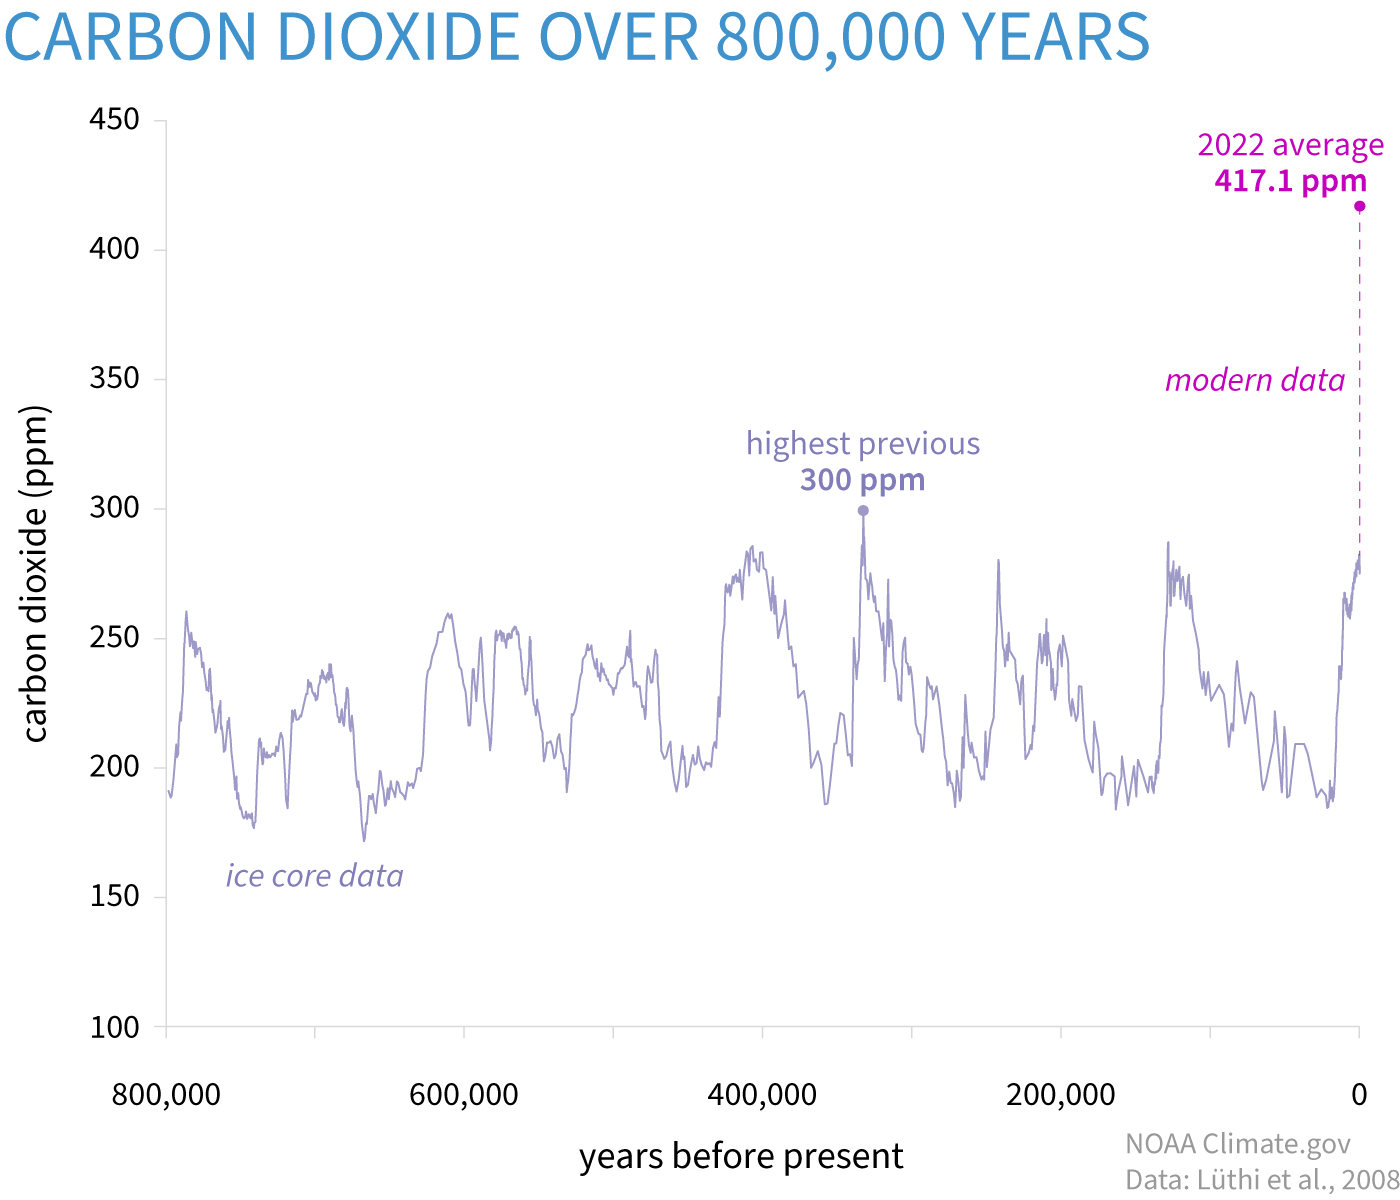

SOURCE: [https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide](https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide)

### <span style="color: green;">IN-CLASS PRACTICE</span>

Go to [https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt](https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt) and save the page as `co2_mm_mlo.txt`. Upload it to the JupyterHub.

Here's what the first part of the file looks like:

```
# --------------------------------------------------------------------
# USE OF NOAA GML DATA
# 
# These data are made freely available to the public and the scientific
# community in the belief that their wide dissemination will lead to
# greater understanding and new scientific insights. To ensure that GML
# receives fair credit for their work please include relevant citation
# text in publications. We encourage users to contact the data providers,
# who can provide detailed information about the measurements and
# scientific insight.  In cases where the data are central to a
# publication, coauthorship for data providers may be appropriate.
# 
# 
# 
# Contact:  Xin Lan (xin.lan@noaa.gov)
# 
# File Creation: Tue Sep  5 03:55:19 2023
# 
# 
# --------------------------------------------------------------------
# 
# 
# See gml.noaa.gov/ccgg/trends/ for additional details.
# 
# Data from March 1958 through April 1974 have been obtained by C. David Keeling
# of the Scripps Institution of Oceanography (SIO) and were obtained from the
# Scripps website (scrippsco2.ucsd.edu).
# Monthly mean CO2 constructed from daily mean values.
# Scripps data downloaded from http://scrippsco2.ucsd.edu/data/atmospheric_co2
# Monthly values are corrected to center of month based on average seasonal
# cycle. Missing days can be asymmetric which would produce a high or low bias.
# Missing months have been interpolated, for NOAA data indicated by negative stdev
# and uncertainty. We have no information for SIO data about Ndays, stdv, unc
# so that they are also indicated by negative numbers
#
# NOTE: Due to the eruption of the Mauna Loa Volcano, measurements from Mauna Loa Observatory
# were suspended as of Nov. 29, 2022. Observations starting in December 2022 are from a site
# at the Maunakea Observatories, approximately 21 miles north of the Mauna Loa Observatory.
# 
#            decimal       monthly    de-season  #days  st.dev  unc. of
#             date         average     alized          of days  mon mean
 1958    3   1958.2027      315.70      314.43     -1   -9.99   -0.99
 1958    4   1958.2877      317.45      315.16     -1   -9.99   -0.99
 1958    5   1958.3699      317.51      314.71     -1   -9.99   -0.99
 1958    6   1958.4548      317.24      315.14     -1   -9.99   -0.99
```

Write code in the cell below that uses `loadtxt` to read this file into a 2d numpy array with 8 columns and as many rows as needed to contain all the data. Then use the matplotlib `plot()` or `scatter()` function to plot the monthly average CO2 concentration as a function of decimal date.

HINTS: notice that `loadtxt` has an optional argument `comment='#'`, implying that it ignores any line that starts with `#`. Notice too that the default for `delimiter` is "whitespace" - i.e., spaces, line breaks, tabs, etc.

FURTHER HINT: you can read the data in one line of code!

### Recap so far

- We can open and read text files using `open`, `read`, `readline`, and `readlines`
- `str.split()` provides a way to split each line into its individual column values
- BUT: for reading numerical data into arrays, numpy's `loadtxt` makes the process much easier

## Writing data to files

So far so good, but what if we want to write data TO a file?
```
with open("mydata.txt", "w") as f:
    f.write("Planet Number")
```

In [ ]:
with open("hardangerjokulen2006-2007.csv") as f:
    help(f.write)

### Example of writing a text file

Recall the planet data we played with a few weeks ago:

| Planet      | Number | Solar irradiance (W/m$^2$) | Albedo | Radius (km$^2$) |
|-------------|--------|-------------------|--------|-----------------|
| Mercury     | 1      | 9,083 | 0.068 | 2,440 |
| Venus | 2   | 2,636 | 0.77 | 6,050 |
| Earth | 3   | 1,360 | 0.31 | 6,370 |
| Mars | 4    | 586   | 0.25 | 3,390 |

In [ ]:
# Put the data in lists
name = ["Mercury", "Venus", "Earth", "Mars"]
irrad = [9083., 2636., 1360., 586.]
albedo = [.068, .77, .31, .25]
radius = [2440., 6050., 6370., 3390.]

Here's one example of how we could save these data in a space-delimited text file:
```
with open("planets.txt", "wt") as f: # .txt means text file; "wt" means write text
    f.write("Planet  Number  Solar irradiance (W/m2)  Albedo  Radius (km2)\n")
    for i in range(4):
        f.write(
            name[i] + " " 
            + str(i) + " "
            + str(irrad[i]) + " "
            + str(albedo[i]) + " "
            + str(radius[i]) + "\n"
        )
```
Note: `write()`, unlike `print()`, does not allow a variable number of arguments, nor does it automatically add a newline at the end.

We can check the contents of the file using the operating system command `cat` (short for "concatenate"), which when used by itself just displays the contents of the file.

To activate an operating-system command from a Jupyter Notebook, precede it with an exclamation point, so:
```
!cat planets.txt
```

We can see that we successfully wrote a file, but the header line is a bit awkward: if a computer program reads the header, it has no easy way to tell that the space between "Planet" and "Number" separates two columns, but "Solar" and "irradiance" are two words that belong in the same column. That's where using a different delimiter, such as a comma, can come in handy.

### <span style="color: green;">IN-CLASS PRACTICE</span>

Copy the above code for the planet data and modify it so that it writes a comma-separated value (csv) file called `planets.csv`.

Test it by using `!cat planets.csv`.

In [ ]:
# your code here


<details>
    <summary>(Click to see solution)</summary>
with open("planets.csv", "wt") as f: # the extension .txt indicates this is a text file; "wt" means write text
    f.write("Planet,Number,Solar irradiance (W/m2),Albedo,Radius (km2)\n")
    for i in range(4):
        f.write(name[i] + "," + str(i) + "," + str(irrad[i]) + "," + str(albedo[i]) + "," + str(radius[i]) + "\n")
</details>

### Read it back in

If we want to read in the numbers from our file but skip over the text parts, we have two challenges: skip over the header line, and skip over the names in the left column. Fortunately, `np.loadtxt()` can handle this. We already saw the `skiprows` parameter, which here we can use to skip over the single header row. There is also a `usecols` parameter: we can pass a tuple that contains the columns that we care about.

Try modifying this line of code using the `skiprows` parameter to skip 1 row, and the `usecols` parameter to read values for columns `(1, 2, 3, 4)`:
```
planet_data = np.loadtxt(...<your args here>...)
```
(HINT: remember to specify `delimiter=","`)

### <span style="color: green;">IN-CLASS PRACTICE</span>

Here's the data from the Canning River that you looked at in Assignment 2:

| River Stretch Name      | Length (m) | Upstream elevation (m) | Downstream elevation (m) | Discharge (cms) |
|-------------|--------|-------------------|--------|-----------------|
| Marsh_Fork     | 2450      | 848 | 808 | 25|
| Upper_Canning | 2350  | 565 | 530 | 18.8 |
| Staines | 2600   | 104 | 101 | 127.3 |
| Canning_distributary | 1200    | 25   | 22 | 20.1 |
| Staines_distributary | 900 | 39 | 36.7 | 115.5 |


1. Write these to either a .csv (comma-delimited) or .txt (space-delimited) file
2. Test that you can read them back in again as a numpy array (or arrays)

### `savetxt()`

Numpy has a `savetxt()` function that can take some of the headache out of writing data to a text file.

Let's revisit our glacier data. First, check that we still have the data as a 2d numpy array:

```
print(har)
```

Here's an example of how we can write this to a text file a bit more easily using `savetxt()`:
```
hardang_header = "Min elev (m),Max elev (m),Area (km2),Winter balance (m/y),Summer balance (m/y)\n"
np.savetxt("harhar.csv", har, header=hardang_header)
!cat harhar.csv
```

### What's missing?

We've seen how to read and write data using basic Python functions, and how numpy's `loadtxt` function makes the reading process easier. But if we only read or save the numerical values, we might end up missing the useful text values. For example, for a data set like the Canning River data, it is useful to retain the names of the stations.

Is there a better way?

### BONUS (if there's time): managing tabular data with a dictionary

CHALLENGE: Create a dictionary for the Canning River data above. The column headers should be the keys, and the values should be numpy arrays containing the values for each column. For example, one key should be `"Discharge"` and the corresponding values should be a numpy array with `[25, 18.8, 127.3, 20.1, 115.5]`.

<details>
<summary><b>(click to see solution)</b></summary>

```
canning_data = {}
canning_data["Name"] = np.array(["Marsh_Fork", "Upper_Canning", "Staines", "Canning_dist", "Staines_dist"])
canning_data["Length"] = np.array([2450, 2350, 2600, 1200, 900])
canning_data["UpperElev"] = np.array([848, 565, 104, 25, 39])
canning_data["LowerElev"] = np.array([808, 530, 101, 22, 36.7])
canning_data["Discharge"] = np.array([25, 18.8, 127.3, 20.1, 115.5])

print(canning_data)
```
</details>

We can do it, but it is a bit laborious. Wouldn't it be nice if there were a Python package that could do it for us? And allow us to easily select data by row or column in the table? And maybe even display a nicely formatted table of our data? STAY TUNED!

## Review

- open a file with the `open()` function
- *file objects*
- read text file contents with `f.read()`, `f.readline()`, and `f.readlines()`
- split lines using `str.split()`
- close a file manually with `f.close()`
- use `with...as` to read or write data
- use read data from a csv-format file
- use `f.write()` to store data in text files
- read a text file with numpy `loadtxt()`
- write a text file with numpy `savetxt()`